# Milestone 1, Phase 1

`Julio Muhammad Rizki, FTDS Batch 003-HCK`

# Objectives

**Problems**

Membuat model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang ada.

**Conceptual Problems**

Jawab pertanyaan berikut:

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !
2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !
3. Bagaimana cara memilih K yang optimal pada KNN ?
4. Jelaskan apa yang dimaksud dengan Cross Validation !
5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

# Library Import

In [632]:
# import library yang akan digunakan

import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings(action='ignore')

import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

import joblib

# Data Loading

In [633]:
# Query from BigQuery, Google Cloud Platform

# SELECT limit_balance, CAST(sex AS INTEGER) AS sex,
#       CAST(education_level AS INTEGER) AS education_level,
#       CAST(marital_status AS INTEGER) AS marital_status,
#       age, pay_0, pay_2, pay_3, pay_4,
#       CAST(pay_5 AS DECIMAL) AS pay_5,
#       CAST(pay_6 AS DECIMAL) AS pay_6,
#       bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5,
#       bill_amt_6,pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4,
#       pay_amt_5, pay_amt_6,
#       CAST(default_payment_next_month AS INTEGER) as default_payment_next_month

# FROM `bigquery-public-data.ml_datasets.credit_card_default`
# LIMIT 5988

**Data Description by BigQuery**

- limit_balance : Balance kredit yang diberikan dalam New Taiwan Dollar (NT Dollar)
- sex : Gender (1=male, 2=female)
- education_level : Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- marital_status : Status pernikahan (1=married, 2=single, 3=others)
- age : Umur dalam tahun
- pay_0 : Status Pembayaran di bulan September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- pay_2 - pay_6 : Status Pembayaran di bulan Agustus dan sebelumnya sampai bulan April, 2005 (scale same as above)
- bill_amt_1 : Jumlah tagihan di bulan September, 2005 (NT dollar)
- bill_amt_2 - bill_amt_6 : Jumlah tagihan di bulan Agustus dan sebelumnya sampai bulan April, 2005 (NT dollar)
- pay_amt_1 : Jumlah pembayaran sebelumnya di bulan September, 2005 (NT dollar)
- pay_amt_2 - pay_amt_6 : Jumlah pembayaran sebelumnya di bulan Agustus dan sebelumnya sampai bulan April, 2005 (NT dollar)
- default_payment_next_month : Default payment, dalam istilah kartu kredit, default payment berarti keadaan ketika pengguna kartu kredit berhenti membayarkan tagihan kredit (1=yes, 0=no)


In [634]:
# memanggil data dengan pd.read dan menampilkan 10 data teratas

df = pd.read_csv('h8dsft_P1M1_Julio_Muhammad_Rizki.csv')
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0,0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0,0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0,0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0
5,500000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,0,155820.0,171565.0,184782.0,152365.0,139757.0,153348.0,20000.0,20241.0,20154.0,20019.0,20151.0,20037.0,0
6,50000.0,1,2,1,40.0,0.0,0.0,0.0,0.0,0,0,49073.0,49531.0,44002.0,44356.0,19344.0,19354.0,1691.0,1942.0,1296.0,674.0,693.0,1000.0,0
7,100000.0,1,5,1,45.0,0.0,0.0,0.0,0.0,0,0,94502.0,95697.0,98222.0,90500.0,82586.0,22620.0,5000.0,5000.0,3203.0,2103.0,50000.0,0.0,0
8,140000.0,1,2,1,29.0,0.0,0.0,0.0,0.0,0,0,130767.0,134946.0,130470.0,132038.0,131961.0,124256.0,6696.0,5000.0,4866.0,5300.0,5055.0,5000.0,0
9,50000.0,1,2,1,43.0,0.0,0.0,0.0,0.0,0,0,48919.0,48775.0,48731.0,48934.0,29116.0,28999.0,1800.0,2200.0,1400.0,582.0,580.0,30000.0,0


In [635]:
# menampilkan 10 data terbawah
 
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,300000.0,2,2,1,28.0,-1.0,-1.0,-1.0,-1.0,-2,-2,16666.0,1000.0,16666.0,0.0,0.0,0.0,1000.0,16666.0,0.0,0.0,0.0,0.0,0
2956,200000.0,2,1,1,49.0,-1.0,-1.0,-1.0,-1.0,-2,-2,413.0,0.0,103.0,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,225.0,0
2957,50000.0,2,1,2,31.0,-1.0,0.0,-1.0,-1.0,-1,-2,12725.0,34526.0,12787.0,3995.0,0.0,0.0,30018.0,12787.0,3995.0,0.0,0.0,0.0,0
2958,50000.0,2,1,2,25.0,-1.0,-1.0,2.0,-1.0,-1,-2,13572.0,17983.0,15590.0,10610.0,0.0,0.0,5000.0,200.0,10610.0,0.0,0.0,0.0,0
2959,100000.0,2,1,2,37.0,-1.0,-1.0,0.0,-1.0,-1,-2,1725.0,21711.0,10487.0,780.0,0.0,0.0,21711.0,1000.0,780.0,0.0,0.0,0.0,0
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1,-2,178.0,1860.0,940.0,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1,-2,2650.0,0.0,855.0,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2,-2,886.0,0.0,930.0,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2,-2,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2964,100000.0,2,1,2,30.0,-1.0,-1.0,-1.0,-1.0,-2,-2,430.0,35993.0,2772.0,0.0,0.0,0.0,35993.0,2772.0,0.0,0.0,0.0,0.0,0


Berikutnya peneliti melakukan pengecekan pada data yang mengalami missing value dan data duplikat.

In [636]:
df.isnull().sum().sum()

0

In [637]:
df[df.duplicated()]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2381,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Karena ditemukan data yang duplikat, peneliti memutuskan untuk membuang index data tersebut.

In [638]:
df.drop_duplicates(inplace=True)

df[df.duplicated()].shape

(0, 24)

In [639]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2964.0,163356.950067,125049.701016,10000.0,50000.00,140000.0,230000.00,800000.0
sex,2964.0,1.607625,0.488362,1.0,1.00,2.0,2.00,2.0
education_level,2964.0,1.849865,0.778159,0.0,1.00,2.0,2.00,6.0
marital_status,2964.0,1.560054,0.522304,0.0,1.00,2.0,2.00,3.0
age,2964.0,35.193657,9.110949,21.0,28.00,34.0,41.00,69.0
pay_0,2964.0,0.004723,1.114434,-2.0,-1.00,0.0,0.00,8.0
pay_2,2964.0,-0.121795,1.180479,-2.0,-1.00,0.0,0.00,7.0
pay_3,2964.0,-0.141026,1.183337,-2.0,-1.00,0.0,0.00,7.0
pay_4,2964.0,-0.184548,1.178049,-2.0,-1.00,0.0,0.00,8.0
pay_5,2964.0,-0.224696,1.158739,-2.0,-1.00,0.0,0.00,7.0


# Exploratory Data Analysis

Selanjutnya dilakukan eksplorasi sederhana terhadap data.

Pertama, peneliti melihat korelasi dari antar variabel terhadap variabel target, yaitu default_payment_next_month

In [640]:
# mendefine phik_val untuk melihat korelasi variabel lain terhadap variabel target

phik_val = df.phik_matrix().default_payment_next_month

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


In [641]:
# melihat korelasi phik_val, dilakukan sort dengan ascending

phik_val.sort_values(ascending=False)

default_payment_next_month    1.000000
pay_0                         0.596572
pay_2                         0.468335
pay_6                         0.386559
pay_3                         0.334726
pay_4                         0.318688
pay_5                         0.315415
limit_balance                 0.191907
bill_amt_4                    0.087360
education_level               0.085359
pay_amt_3                     0.083774
bill_amt_1                    0.073974
bill_amt_3                    0.073073
age                           0.067038
bill_amt_2                    0.064086
pay_amt_4                     0.062588
pay_amt_1                     0.046866
pay_amt_5                     0.022282
marital_status                0.020055
bill_amt_5                    0.019495
sex                           0.015281
pay_amt_2                     0.004992
bill_amt_6                    0.000000
pay_amt_6                     0.000000
Name: default_payment_next_month, dtype: float64

Peneliti memutuskan untuk membuang variabel-variabel dengan tingkat korelasi dibawah 0.1 terhadap variabel target.

In [642]:
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

In [643]:
# mendrop kolum-kolum tak terpakai

df2 = df.drop(['sex', 'education_level', 'marital_status', 'age', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6'], axis=1)

df2

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,130000.0,0.0,0.0,0.0,0.0,0,0,0
1,230000.0,0.0,0.0,0.0,0.0,0,0,1
2,200000.0,0.0,0.0,0.0,0.0,0,0,0
3,500000.0,0.0,0.0,0.0,0.0,0,0,0
4,230000.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...
2960,30000.0,-1.0,-1.0,2.0,-1.0,-1,-2,1
2961,20000.0,-1.0,-1.0,-1.0,-1.0,-1,-2,0
2962,280000.0,-1.0,-1.0,-1.0,-1.0,-2,-2,0
2963,360000.0,-1.0,-1.0,-1.0,-1.0,-2,-2,0


In [644]:
df2.columns

Index(['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
       'default_payment_next_month'],
      dtype='object')

Selanjutnya dilihat kembali korelasi variabel-variabel yang ada terhadap target, kali ini dengan heatmap.

In [645]:
other_col = ['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [646]:
phik_overview = df2[other_col+['default_payment_next_month']].phik_matrix()

interval columns not set, guessing: ['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']


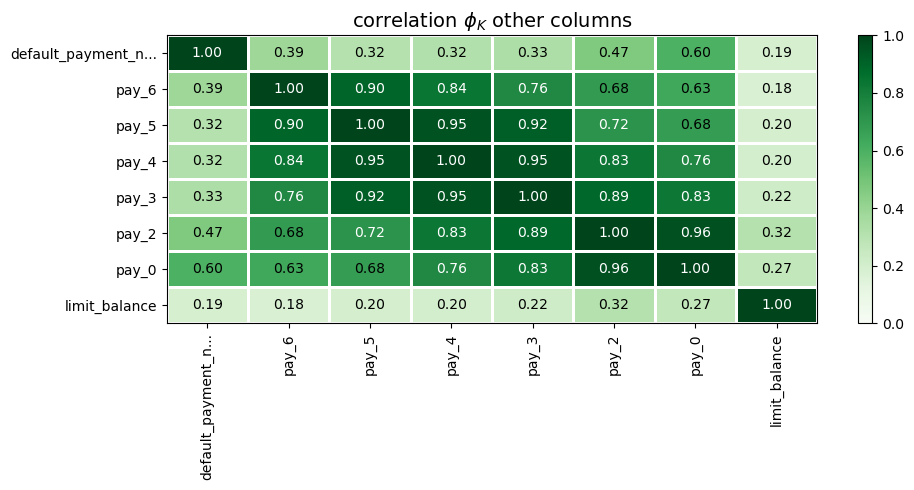

In [647]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ other columns", 
                        fontsize_factor=1, 
                        figsize=(10,5))
plt.show()

Selanjutnya dilihat distribusi data pada variabel-variabel yang ada.

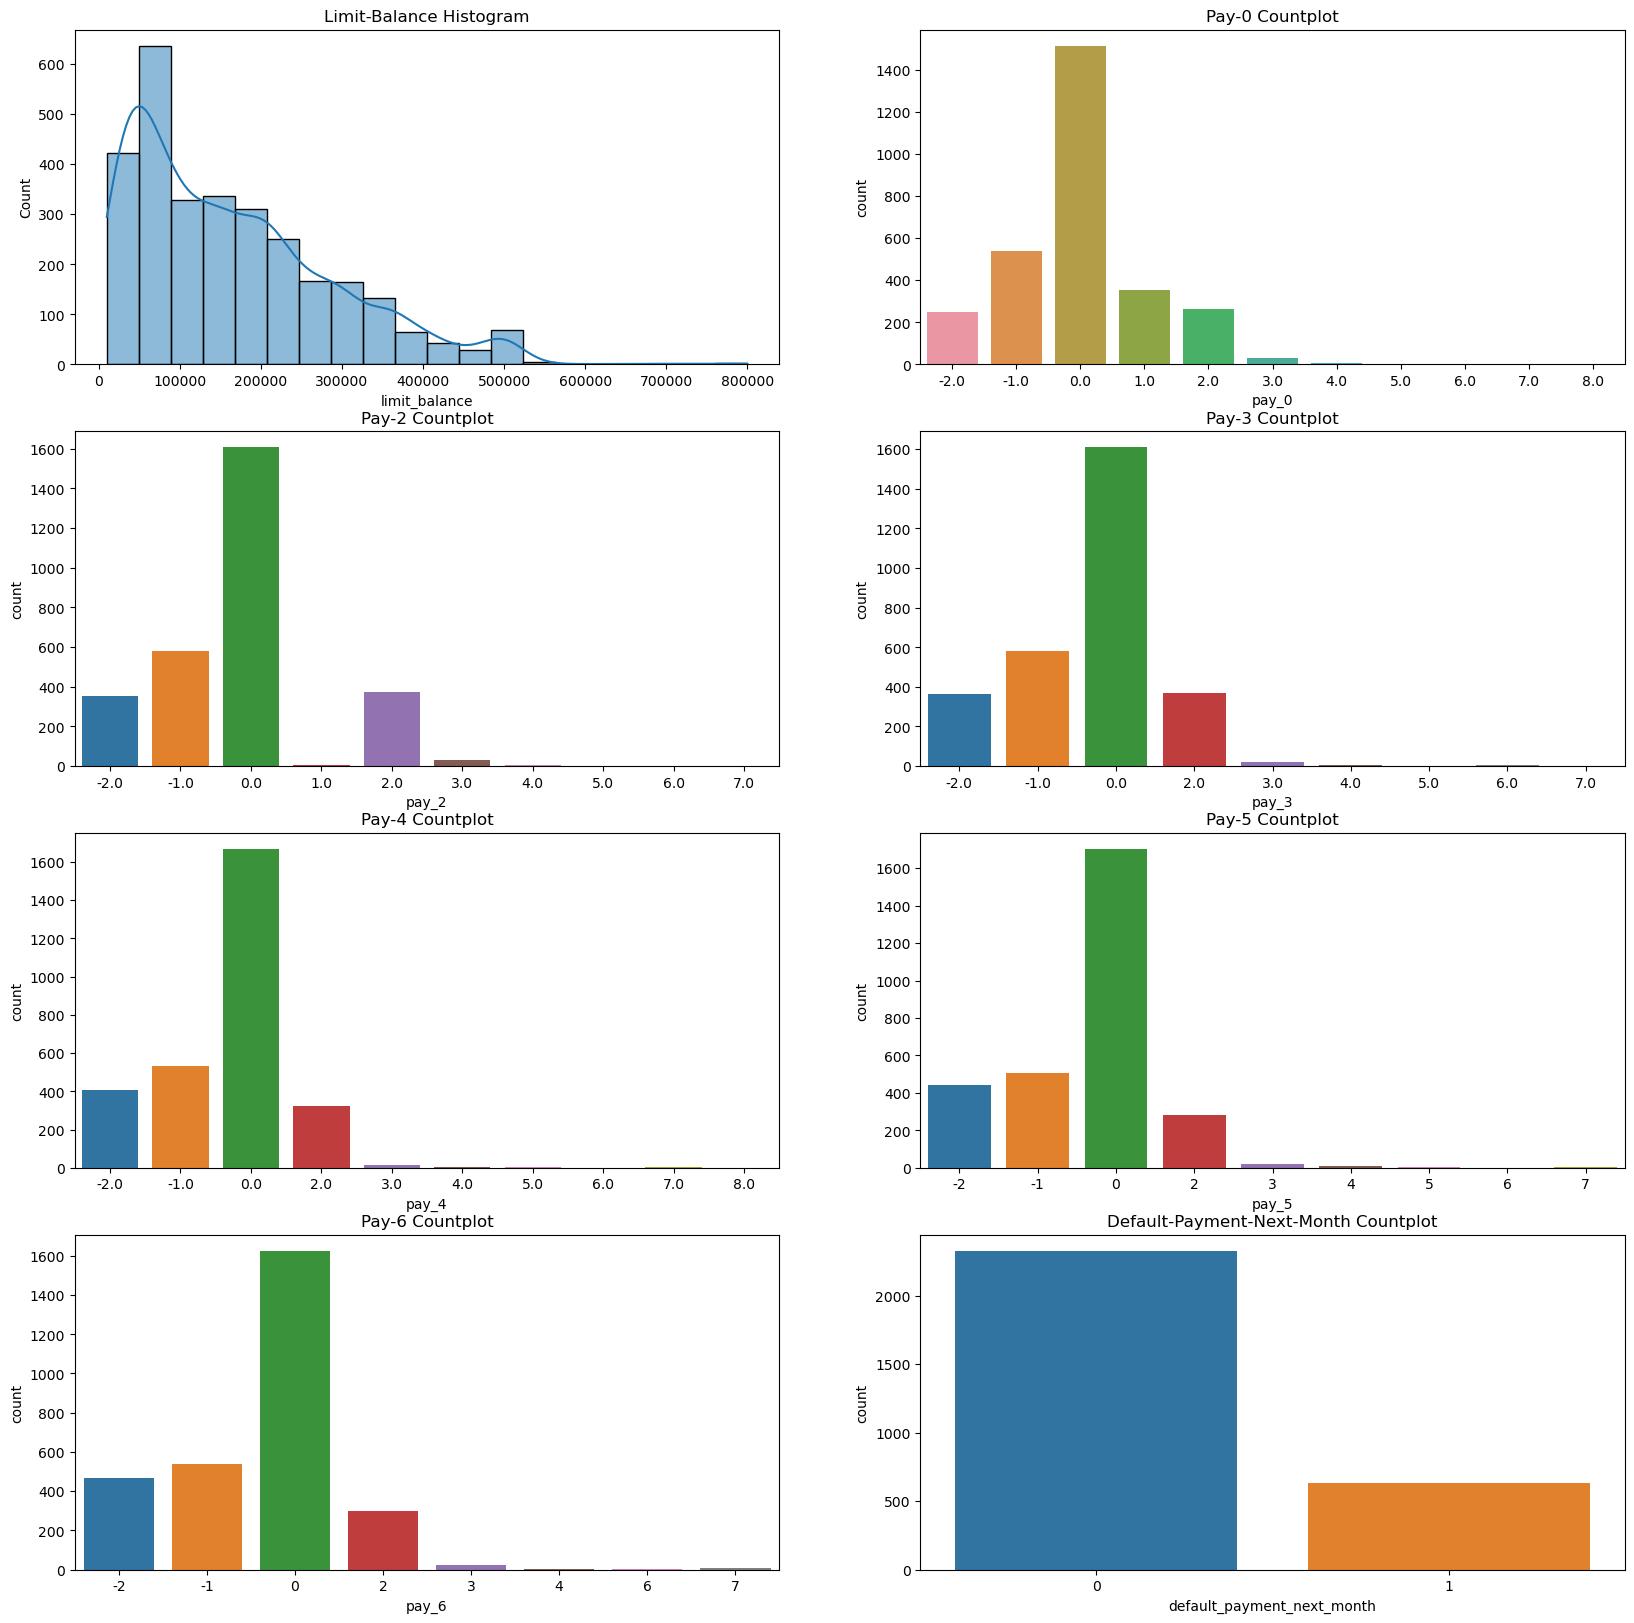

In [648]:
# memvisualisasikan masing-masing kolum dengan plot, histplot pada numerical dan countplot pada categorical

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=[20,20])

a = sns.histplot(df2['limit_balance'], bins=20, kde=True, ax=ax[0,0])
a.set_title('Limit-Balance Histogram')

b = sns.countplot(data=df2, x='pay_0', ax=ax[0,1])
b.set_title('Pay-0 Countplot')

c = sns.countplot(data=df2, x='pay_2', ax=ax[1,0])
c.set_title('Pay-2 Countplot')

d = sns.countplot(data=df2, x='pay_3', ax=ax[1,1])
d.set_title('Pay-3 Countplot')

e = sns.countplot(data=df2, x='pay_4', ax=ax[2,0])
e.set_title('Pay-4 Countplot')

f = sns.countplot(data=df2, x='pay_5', ax=ax[2,1])
f.set_title('Pay-5 Countplot')

g = sns.countplot(data=df2, x='pay_6', ax=ax[3,0])
g.set_title('Pay-6 Countplot')

h = sns.countplot(data=df2, x='default_payment_next_month', ax=ax[3,1])
h.set_title('Default-Payment-Next-Month Countplot')

plt.show()

Selanjutnya dilakukan pengecekan terhadap multicollinearity dan cardinality pada data.

In [649]:
# mengecek multicollinearity dengan VIF

def calc_vif(x):

    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [650]:
calc_vif(df2[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'limit_balance']])

,variables,VIF
0,pay_0,1.850244
1,pay_2,3.131830
2,pay_3,3.401713
3,pay_4,4.080875
4,pay_5,4.811418
5,pay_6,3.210091
6,limit_balance,1.123239


Berdasarkan hasil tersebut, pada variabel yang ada sudah tidak terdapat multicollinearity.

In [651]:
df2.nunique()

limit_balance                 59
pay_0                         11
pay_2                         10
pay_3                          9
pay_4                         10
pay_5                          9
pay_6                          8
default_payment_next_month     2
dtype: int64

Pada kolum pay_0, 2, dan 4 terdapat cardinality. Namun karena dari kolum pay 0 sampai pay 6 memiliki kemiripan dalam penjelasan data, peneliti memutuskan untuk melakukan grouping pada kolum-kolum tersebut. 

Berdasarkan penjelasan di BigQuery mengenai data, khususnya pada kolum pay 0 sampai pay 6, value 1 sampai 8 menjelaskan keterlambatan dalam bentuk jumlah bulan terlambat. Namun pada -2, -1, dan 0 tidak dijelaskan secara spesifik melainkan pembayaran sudah terpenuhi. Maka peneliti memutuskan untuk meng-group value -2, -1, dan 0 menjadi sebuah value yang sama yaitu 0.

In [652]:
df2.columns

Index(['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
       'default_payment_next_month'],
      dtype='object')

In [653]:
# me-replace value -2 dan -1 pada column pay menjadi 0
df2[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']] = df2[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].replace(to_replace=[-2,-1], value=0)

In [654]:
for i in df2[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]:
    print(i,df2[i].unique())

pay_0 [0. 2. 3. 4. 5. 6. 7. 8. 1.]
pay_2 [0. 2. 3. 4. 5. 6. 7. 1.]
pay_3 [0. 2. 3. 4. 6. 7. 5.]
pay_4 [0. 2. 3. 5. 4. 6. 7. 8.]
pay_5 [0 2 3 4 5 6 7]
pay_6 [0 2 3 6 7 4]


# Data Preprocessing

Berikutnya dilakukan preprocessing terhadap data untuk memudahkan model machine learning dalam belajar nantinya. Disini akan dilakukan pemisahan fitur dan target, scaling dan encoding jika diperlukan, serta handling terhadap outlier.

In [655]:
feature = ['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
target = ['default_payment_next_month']

In [656]:
# split data terhadap data train dan data test, tidak langsung di split ke X dan y karena peneliti akan menghandle outlier terlebih dulu

data_train, data_test = train_test_split(df2, test_size=0.2, random_state=14, stratify=df.default_payment_next_month)

print('Train Size : ', data_train.shape)
print('Test Size  : ', data_test.shape)

Train Size :  (2371, 8)
Test Size  :  (593, 8)


Pengecekan outlier pada kolum limit_balance, karena hanya kolum tersebut yang berbentuk numerical.

Skewness value:  1.0000446026718248


<AxesSubplot:>

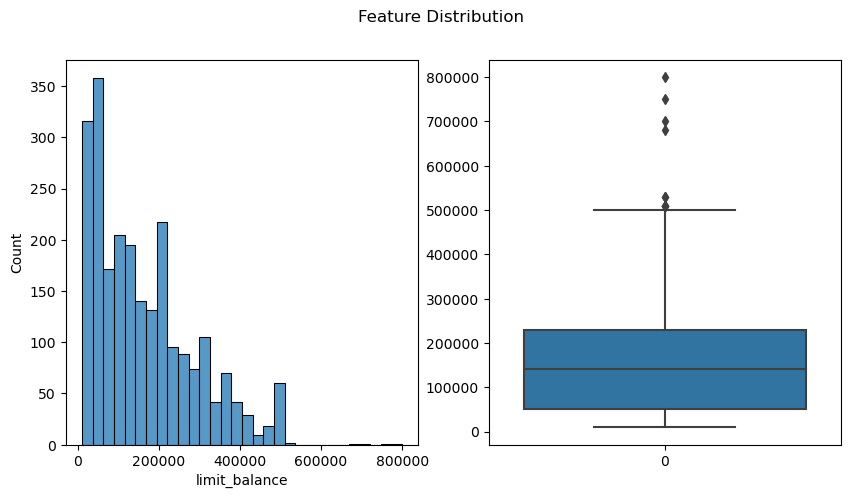

In [657]:
# pengecekan skewness dan outlier

print('Skewness value: ', data_train['limit_balance'].skew())
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Feature Distribution', fontsize=12)
sns.histplot(data=data_train['limit_balance'], ax=axes[0])
sns.boxplot(data=data_train['limit_balance'], ax=axes[1])

In [658]:
# mendefine IQR untuk melihat tingkat outlier

Q1 = np.quantile(data_train['limit_balance'], 0.25)
Q3 = np.quantile(data_train['limit_balance'], 0.75)
IQR =  Q3 - Q1
upper_boundary = Q3 + 1.5 * IQR
lower_boundary = Q1 - 1.5 * IQR

outlier = data_train[(data_train['limit_balance'] > upper_boundary) | (data_train['limit_balance'] < lower_boundary)]
print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/data_train.shape[0] * 100, '%')

count of outlier:  10
percentage of outlier:  0.42176296921130324 %


In [659]:
# pembuangan outlier

data_train_cleaned = data_train[(data_train['limit_balance'] <= upper_boundary) & (data_train['limit_balance'] >= lower_boundary)]
data_train_cleaned.shape

(2361, 8)

In [660]:
# pengecekan kembali pada outlier

outlier_cleaned = data_train_cleaned[(data_train_cleaned['limit_balance'] > upper_boundary) | (data_train_cleaned['limit_balance'] < lower_boundary)]
print('count of outlier: ', outlier_cleaned.shape[0])
print('percentage of outlier: ', outlier_cleaned.shape[0]/data_train_cleaned.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


Setelah dilakukan handling pada outlier, target dan fitur dipisah kedalam X dan y

In [661]:
X_train = data_train.drop('default_payment_next_month', axis=1)
y_train = data_train['default_payment_next_month']

In [662]:
X_train.head()

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
1094,80000.0,0.0,0.0,0.0,2.0,0,0
2936,200000.0,0.0,0.0,0.0,0.0,0,0
574,230000.0,0.0,0.0,0.0,0.0,0,0
1736,100000.0,2.0,3.0,3.0,2.0,2,3
1003,240000.0,0.0,0.0,0.0,0.0,0,0


In [663]:
y_train.head()

1094    0
2936    0
574     0
1736    1
1003    0
Name: default_payment_next_month, dtype: int64

In [664]:
X_test = data_test.drop('default_payment_next_month', axis=1)
y_test = data_test['default_payment_next_month']

In [665]:
X_train.columns

Index(['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'], dtype='object')

Berikutnya untuk melakukan scaling/encoding maka kolum numerical dan categorical dipisah terlebih dahulu.

In [666]:
num_col = ['limit_balance']
cat_col = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

print('Numerical Columns : ', num_col)
print('Categorical Columns : ', cat_col)

Numerical Columns :  ['limit_balance']
Categorical Columns :  ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [667]:
X_train_num = X_train[num_col]
X_train_cat = X_train[cat_col]

X_test_num = X_test[num_col]
X_test_cat = X_test[cat_col]

In [668]:
# scaling pada kolum numerical menggunakan MinMax

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.08860759],
       [0.24050633],
       [0.27848101],
       ...,
       [0.55696203],
       [0.12658228],
       [0.21518987]])

Peneliti berpendapat, pada cat_col tidak perlu lagi di encode karena walaupun kolum merupakan kategorical, valuenya sudah numeric. 

Kemudian kolum numerical yang sudah di scaling dan kolum categorical digabungkan kembali. 

In [669]:
# menggabungkan kembali kolum dengan concatenate

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

X_train_final

array([[0.08860759, 0.        , 0.        , ..., 2.        , 0.        ,
        0.        ],
       [0.24050633, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27848101, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.55696203, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12658228, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21518987, 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ]])

# Model Definition

Berikutnya, akan dilakukan percobaan terhadap model mana yang terbaik untuk digunakan dalam memprediksi data ini.

In [670]:
# define semua model di dalam sebuah list

models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), GaussianNB(), AdaBoostClassifier()]

Peneliti menggunakan recall sebagai scoring karena berdasarkan data, penting untuk memfokuskan model pada recall terhadap True Negatif. 

In [671]:
# menentukan best model dengan for loop

best_model = []
best_score = 0

for i in models:
    model = i
    model_cv = cross_val_score(model, X_train_final, y_train, cv=StratifiedKFold(n_splits=3, random_state = 14, shuffle= True), scoring="recall")
    if model_cv.mean() > best_score:
        best_model = i
        best_score = model_cv.mean()

    print(f'\nModel {i}')
    print('Recall Score - All - Cross Validation  : ', model_cv)
    print('Recall Score - Mean - Cross Validation : ', model_cv.mean())
    print('Recall Score - Std - Cross Validation  : ', model_cv.std())
    print('Recall Score - Range of Test-Set       : ', (model_cv.mean()-model_cv.std()) , '-', (model_cv.mean()+model_cv.std()))

print(f'\nBest Model : {best_model}')
print(f'Best Score : {best_score}')



Model LogisticRegression()
Recall Score - All - Cross Validation  :  [0.36470588 0.32544379 0.36094675]
Recall Score - Mean - Cross Validation :  0.35036547163244
Recall Score - Std - Cross Validation  :  0.017688990016498922
Recall Score - Range of Test-Set       :  0.33267648161594104 - 0.3680544616489389

Model SVC()
Recall Score - All - Cross Validation  :  [0.39411765 0.40236686 0.44378698]
Recall Score - Mean - Cross Validation :  0.4134238310708899
Recall Score - Std - Cross Validation  :  0.021732511846262355
Recall Score - Range of Test-Set       :  0.3916913192246276 - 0.4351563429171523

Model DecisionTreeClassifier()
Recall Score - All - Cross Validation  :  [0.35882353 0.35502959 0.34911243]
Recall Score - Mean - Cross Validation :  0.354321847082028
Recall Score - Std - Cross Validation  :  0.0039960023994438576
Recall Score - Range of Test-Set       :  0.35032584468258415 - 0.3583178494814719

Model RandomForestClassifier()
Recall Score - All - Cross Validation  :  [0.3

Berdasarkan for loop diatas, ditemukan bahwa model dengan recall paling baik adalah Gaussian Naive Bayes. Untuk selanjutnya peneliti akan menggunakan GaussianNB untuk pembuatan model.

In [672]:
gaussian = GaussianNB()

# Model Training

Model di training dengan default parameter dan dengan parameter yang sudah di tuning menggunakan GridSearchCV

**Model dengan Parameter Default**

In [673]:
# fit model default

gaussian.fit(X_train_final, y_train)

GaussianNB()

In [674]:
# predict model default

y_pred_train_gaussian = gaussian.predict(X_train_final)
y_pred_test_gaussian = gaussian.predict(X_test_final)

**Model dengan Parameter yang sudah di Tuning**

In [675]:
# GridSearch hyper parameter GaussianNB untuk kemudian di fit dengan hasil hyper parameter dari search
# Start dimulai dari bawah, Stop berarti berhenti dimana
# Num adalah jumlah berapa kali pencarian
# CV berarti pengulangan percobaan dengan beberapa jumlah data yang terpartisi

param_grid = {'var_smoothing': np.logspace(start=-9, stop=0, num=100)}

gaussian_grid = GridSearchCV(gaussian, param_grid, cv=5, verbose=1, scoring='recall')

gaussian_grid.fit(X_train_final, y_train)

gaussian_grid.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 1e-09}

In [676]:
# penggunaan best estimator

gaussian_best = gaussian_grid.best_estimator_

In [677]:
# predict model hasil tuning

y_pred_train_gaussian_best = gaussian_best.predict(X_train_final)
y_pred_test_gaussian_best = gaussian_best.predict(X_test_final)

# Model Evaluation

Berikutnya dilakukan evaluasi terhadap model. Namun berdasarkan GridSearch, hyper parameter terbaik yang ditemukan sama saja dengan default. Maka tidak terdapat perbedaan pada kedua model.

In [678]:
# classification report pada hasil train

print(classification_report(y_train, y_pred_train_gaussian))
print(classification_report(y_train, y_pred_train_gaussian_best))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1863
           1       0.56      0.44      0.50       508

    accuracy                           0.81      2371
   macro avg       0.71      0.68      0.69      2371
weighted avg       0.79      0.81      0.80      2371

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1863
           1       0.56      0.44      0.50       508

    accuracy                           0.81      2371
   macro avg       0.71      0.68      0.69      2371
weighted avg       0.79      0.81      0.80      2371



Terlihat berdasarkan model yang telah dibuat, kemampuan recall pada class (1) tergolong rendah dengan skor 0.44. Berarti kemampuan model dalam memprediksi hasil cenderung menampilkan hasil yang berupa False Negatif.

In [679]:
# classification report pada hasil test

print(classification_report(y_test, y_pred_test_gaussian))
print(classification_report(y_test, y_pred_test_gaussian_best))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       466
           1       0.61      0.47      0.53       127

    accuracy                           0.82       593
   macro avg       0.74      0.69      0.71       593
weighted avg       0.81      0.82      0.81       593

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       466
           1       0.61      0.47      0.53       127

    accuracy                           0.82       593
   macro avg       0.74      0.69      0.71       593
weighted avg       0.81      0.82      0.81       593



Pada hasil test juga ditemukan hasil yang sama. Walaupun terdapat sedikit peningkatan pada masing-masing skor. Tetap ditemukan bahwa model memiliki kemampuan yang cenderung rendah, khususnya dalam mempredik class (1). Dengan ini dapat disimpulkan Model mengalami underfit karena kemampuan model dalam memprediksi masih belum optimal, baik pada hasil train dan hasil test.

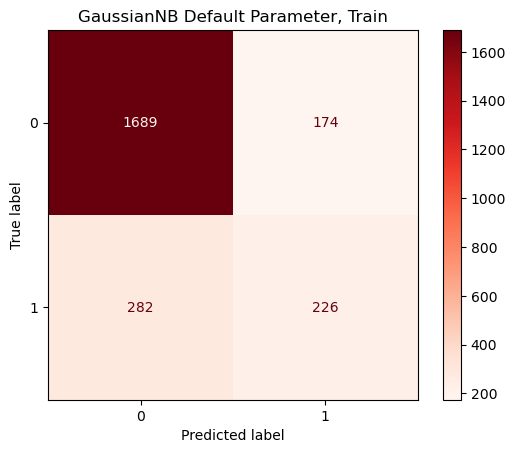

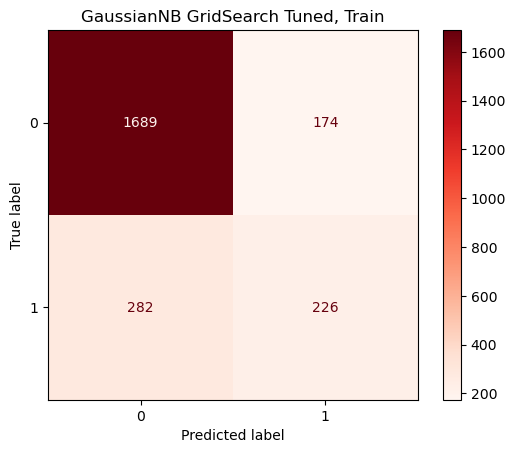

In [680]:
# confusion matrix pada hasil train

a = ConfusionMatrixDisplay.from_estimator(gaussian, X_train_final, y_train, cmap='Reds')
a.ax_.set_title('GaussianNB Default Parameter, Train')

b = ConfusionMatrixDisplay.from_estimator(gaussian_best, X_train_final, y_train, cmap='Reds')
b.ax_.set_title('GaussianNB GridSearch Tuned, Train');

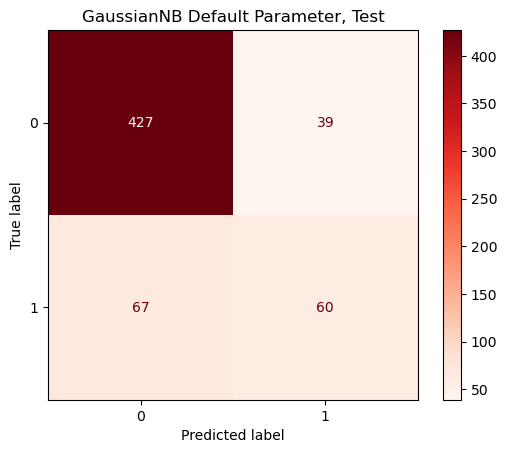

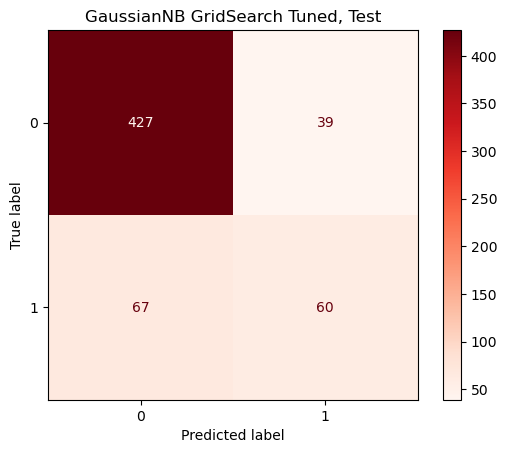

In [681]:
# confusion matrix pada hasil test

c = ConfusionMatrixDisplay.from_estimator(gaussian, X_test_final, y_test, cmap='Reds')
c.ax_.set_title('GaussianNB Default Parameter, Test')

d = ConfusionMatrixDisplay.from_estimator(gaussian_best, X_test_final, y_test, cmap='Reds')
d.ax_.set_title('GaussianNB GridSearch Tuned, Test');

Berdasarkan confusion matrix juga terlihat bahwa model kurang optimal dalam memprediksi class (1), baik pada train dan pada test model.

# Model Inference

Model Inference dilakukan pada notebook terpisah. Selanjutnya dilakukan Model Saving agar model dapat digunakan diluar notebook ini.

## Model Saving

In [682]:
with open('minmax_scaler.pkl', 'wb') as file_1:
  joblib.dump(scaler, file_1)
  
with open('gaussian.pkl', 'wb') as file_2:
  joblib.dump(gaussian_best, file_2)
  
with open('num_col.pkl', 'wb') as file_3:
  joblib.dump(num_col, file_3)
  
with open('cat_col.pkl', 'wb') as file_4:
  joblib.dump(cat_col, file_4)

Cell-cell dibawah ini hanya digunakan untuk membantu peneliti mengerjakan inference notebook.

In [683]:
X_train.columns

Index(['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'], dtype='object')

In [684]:
X_train['limit_balance'].describe()

count      2371.000000
mean     163087.304935
std      125161.163494
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      230000.000000
max      800000.000000
Name: limit_balance, dtype: float64

In [685]:
X_train_num.describe()

,limit_balance
count,2371.000000
mean,163087.304935
std,125161.163494
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,230000.000000
max,800000.000000


In [686]:
X_train_cat

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
1094,0.0,0.0,0.0,2.0,0,0
2936,0.0,0.0,0.0,0.0,0,0
574,0.0,0.0,0.0,0.0,0,0
1736,2.0,3.0,3.0,2.0,2,3
1003,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...
2478,0.0,0.0,0.0,0.0,0,0
2943,0.0,0.0,0.0,0.0,0,0
2947,0.0,0.0,0.0,0.0,0,0
2368,1.0,0.0,0.0,0.0,0,0


In [687]:
X_train_cat['pay_0'].sort_values().unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

# Overall Analysis

Dari hasil model yang telah dibuat dan berdasarkan seluruh penelitian diatas, dapat disimpulkan beberapa hal:
- Model mengalami underfit, karena skor yang cukup rendah pada model train dan model test
- Kemampuan model dalam memprediksi class (1) cukup rendah, menunjukkan bahwa kemampuan model yang cenderung menampilkan hasil False Negatif
- Pada hyperparameter tuning, ditemukan bahwa dari hasil pencarian, best parameter yang ditemukan adalah sama dengan parameter default. Maka tidak terdapat perbedaan pada model default dengan model hasil tuning.
- Karena model mengalami underfit dan kekurang mampuan model dalam memprediksi salah satu class, peneliti berpendapat mungkin dibutuhkan eksplorasi atau preprocess lebih. Grouping mungkin dapat dilakukan lebih baik, atau fitur yang digunakan mungkin dapat ditambah.
- Mungkin pada pemilihan model, dapat dipilih berdasarkan f1 score tertinggi dibandingkan recall tertinggi. Dari sini mungkin model akan berbeda dengan hasil prediksi yang mungkin akan lebih baik.
- Penggunaan pipeline belum diimplementasikan oleh penulis, baiknya menggunakan pipeline untuk memudahkan pengerjaan model.

**Conceptual Problems**

Jawab pertanyaan berikut:

1. `Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !`

Criterion adalah sebuah parameter yang digunakan untuk menentukan bagaimana impurity sebuah split akan diukur, yang nantinya dapat menentukan kualitas dari split tersebut. Dalam penelitian ini, peneliti tidak menggunakan decision tree maka tidak ada criterion yang digunakan. Salah satu criterion dalam decision tree adalah gini, dimana gini adalah sebuah metrik yang mengukur tingkat purity didalam sebuah node/leaf. Skor gini diatas 0 menjelaskan bahwa sample pada sebuah node tergolong pada kelas yang lain atau masih dapat turun ke turunan berikutnya.

referensi : https://bit.ly/3WzmoRj

2. `Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !`

Pruning adalah sebuah teknik yang digunakan untuk mengurangi overfitting. Pruning juga men-simplifies sebuah decision tree dengan membuang rules paling lemah. Pruning terbagi menjadi Pre-pruning dan Post-pruning. Pre-pruning menghentikan decision tree sebelum tree menyelesaikan klasifikasi terhadap training set. Post-pruning membiarkan tree untuk menyelesaikan klasifikasi terhadap training set baru kemudian dilakukan pruning terhadap tree-nya.

referensi : https://bit.ly/3iIm58S

3. Bagaimana cara memilih K yang optimal pada KNN ?

Salah satu cara untuk menemukan K yang optimal adalah dengan mencoba berbagai macam nilai K dan memilih K yang memberi performa terbaik. K yang biasa digunakan berkisar antara 1 - 20. K yang terlalu kecil menyebabkan decision boundaries yang kurang stabil. K yang optimal biasa ditemukan pada square root N, dimana N adalah jumlah sample.

referensi : https://bit.ly/3IValKI

4. Jelaskan apa yang dimaksud dengan Cross Validation !

Cross Validation adalah sebuah metode statistik yang digunakan untuk mengestimasi performa sebuah model machine learning. CV biasa digunakan untuk melindungi model terhadap overfitting di model prediktif, khususnya pada kasus dimana jumlah data yang limited. Dalam sebuah CV, data akan dipartisi, kemudian di run di setiap partisinya, dan akan dirata-ratakan kemungkinan tingkat errornya.

referensi : https://bit.ly/3Wp2VT4

5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

Dalam sebuah model machine learning, dibutuhkan evaluasi terhadap performa model untuk menunjukkan bagaimana kemampuan model tersebut menghasilkan prediksi. Output dalam sebuah machine learning (classification) dapat terbagi kedalam beberapa kategori (dengan menggunakan contoh):
- True Positif, dimana keadaan nyata dan hasil prediksi sesuai, sama-sama positif (seorang ibu keadaannya hamil, dan mesin mempredik bahwa ibu itu sedang hamil)
- True Negatif, dimana keadaan nyata yang negatif menunjukkan hasil prediksi yang juga negatif (bapak tidak hamil, diprediksi mesin bahwa bapak tidak hamil)
- False Positif, keadaan nyata yang negatif namun diprediksi positif (bapak tidak hamil, tapi mesin memprediksi hamil)
- False Negatif, keadaan nyata yang positif namun diprediksi negatif (ibu sedang hamil, tapi mesin memprediksi tidak hamil)

Kemudian, berdasarkan 4 kategori tersebut didapatkan 4 metrik penilaian.
- Accuracy : melihat skor akurasi bagaimana machine learning memprediksi dengan benar pada True Positif dan True Negatif
- Precision : memfokuskan pada hasil True Positif dan False Positif
- Recall : memfokuskan pada hasil True Positif dan False Negatif, semakin besar tingkat recall makan tingkat FN lebih rendah
- F1 score : gabungan dari precision dan recall, F1 lebih baik dari accuracy, terlebih pada data dengan distribusi kelas yang tidak seimbang

referensi : 
- https://bit.ly/3ZDxJ5v 
- https://bit.ly/3Hgeckt   
- https://bit.ly/3XCKqLR